In [1]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt
%matplotlib inline 

C:\Users\Nikhil\anaconda3\envs\myenv\lib\site-packages\ale_py\roms\utils.py:90: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for external in metadata.entry_points().get(self.group, []):


creating the environment

In [2]:
env = gym.make("CliffWalking-v0")
env.render()

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T



In [3]:
state_size = env.observation_space.n
action_size = env.action_space.n

state_size, action_size

(48, 4)

In [4]:
qtable = np.zeros((state_size, action_size))
qtable

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],


In [5]:
total_episodes = 10_000        # Total episodes
learning_rate = 0.9           # Learning rate
max_steps = 100                # Max steps per episode
gamma = 0.95                  # Discounting rate

# Exploration parameters
epsilon = 1               # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon =0.01            # Minimum exploration probability 
decay_rate = 0.001             # Exponential decay rate for exploration prob

![alt text](sarsa_alg.png "Algorithm")

In [6]:
def select_action(state):
    exp_exp_tradeoff = random.uniform(0,1)
        
    if exp_exp_tradeoff > epsilon:
        return np.argmax(qtable[state,:])
    else:
        return env.action_space.sample()

In [7]:
rewards = []

# Loop for each episode:
for episode in range(total_episodes):
    
    # Initialize S
    state = env.reset()
    # Choose A from S using policy derived from Q (e.g., "epsilon-greedy)
    action = select_action(state)
    done = False
    total_rewards = 0
    
    # Loop for each step of episode:
    for step in range(max_steps):        

        # Take action A, observe R, new_state
        new_state, reward, done, info = env.step(action)
        
        # Choose A' from S' using policy derived from Q (e.g., "epsilon-greedy)
        new_action = select_action(new_state)
        
        # SARSA algorithm
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + (gamma * qtable[new_state, new_action]) - qtable[state, action])
        
        total_rewards += reward
        
        # S = S'; A = A';
        state = new_state
        action = new_action
        
        if done == True:
            break
            
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
    rewards.append(total_rewards)
    
print(qtable)

[[ -33.35163071  -10.24650054  -24.87948516  -12.04672316]
 [ -20.21463655  -18.54542961  -20.2628698   -20.44208984]
 [ -49.78134598  -25.63784635  -20.66788412  -18.60470583]
 [ -20.72177339   -8.62399815  -20.00258107  -20.89542194]
 [ -19.00573106   -8.02526122  -20.04862622  -18.96099509]
 [ -13.59635652   -7.39501181  -19.93891779  -15.41694976]
 [ -13.47954688   -6.73159137  -13.24131088  -16.53408814]
 [ -12.7957083    -6.03325408  -13.07075337  -13.19866216]
 [ -12.58895749   -5.29816219  -12.54606901  -12.67166453]
 [ -12.41470713   -4.52438125  -76.3777088   -12.17059612]
 [  -5.32037288   -8.76202729   -3.709875    -10.494563  ]
 [  -7.47762587   -7.74679831   -2.85253483   -8.19991904]
 [ -22.37341615  -16.39399041  -20.01812534  -24.23336402]
 [ -23.73794163  -21.44270536  -11.91088385  -20.00003655]
 [ -20.00266568  -51.73304647  -80.04335607  -22.65064639]
 [  -9.19279825  -61.83063253  -28.40944324  -20.03448697]
 [ -27.76451792  -25.13464193  -24.88852039  -12.5775814

Text(0, 0.5, 'reward')

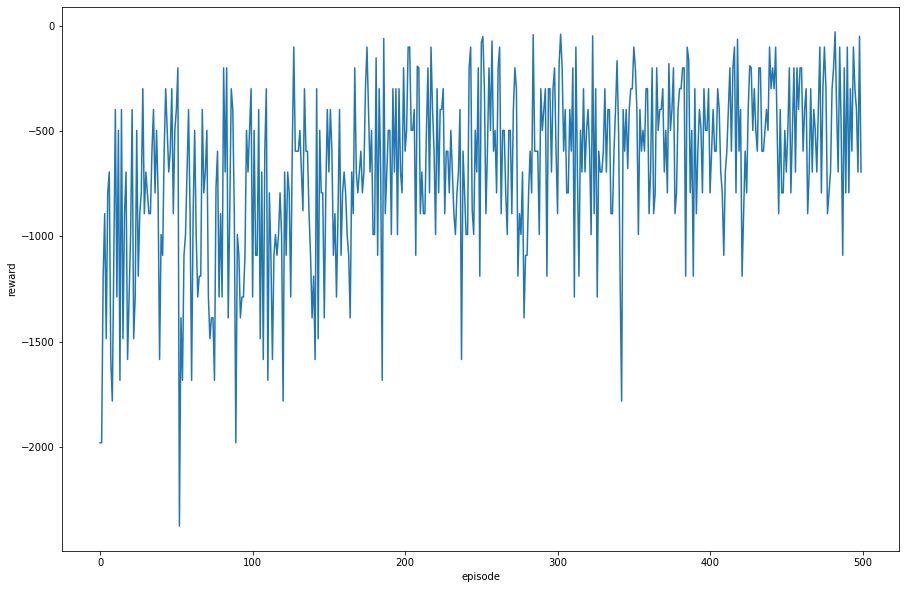

In [8]:
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(range(500), rewards[:500] )
ax.set_xlabel("episode")
ax.set_ylabel("reward")

Text(0, 0.5, 'reward')

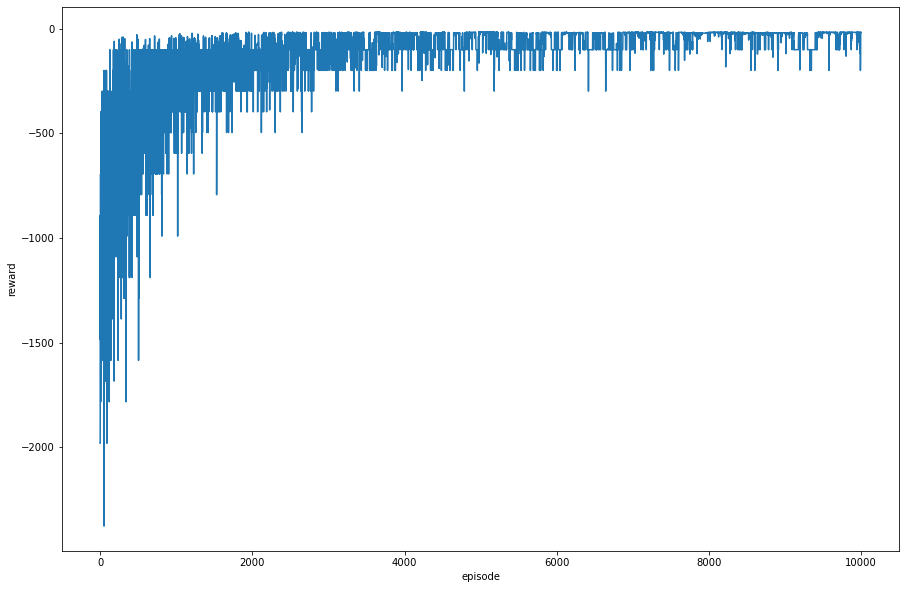

In [9]:
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(range(total_episodes), rewards)
ax.set_xlabel("episode")
ax.set_ylabel("reward")

In [10]:
# saving the learnt q-table
np.save("cliff-q-table", qtable)